In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import io as sio
import pandas as pd
import os
from collections import Counter

In [2]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [3]:
#Preprocessing matfiles into a dataframe 
def pre_process(matfiles):
    #We will store the dataframes corresponding to tuples of the resulted classification
    #We are doing this to avoid combining the dataframes which results in NaN values
    Xy = {}
    for matfile in matfiles:
        #sio.loadmat returns a readable dictionary
        mat = sio.loadmat(matfile)
        data = np.transpose(mat['XTIC'])

        # SAM contains the name of each sample
        sample_names = mat['SAM']
        sample_names = np.hstack(np.hstack(sample_names)).tolist()  # convert nested numpy arrays into a list

        # RT - retention time (in minutes)    
        RT = mat['RT']
        RT = np.hstack(np.hstack(RT)).tolist()  # convert nested numpy arrays into a list

        #Convert to dataframe for analysis
        this_df = pd.DataFrame(data, columns=sample_names, index=RT)
        #Samples are always located on the rowsand columns represent features, so we are transposing the dataset
        this_df = this_df.T

        #CLASS - diagnosis of each sample (2=CD)    
        this_y = tuple(np.hstack(mat['CLASS']).tolist())
        
        #Storing the dataframe (X) to the corresponding labels tuple (y)
        Xy[this_y] = this_df
        
    return Xy

In [4]:
#Define path to data
path_to_data = os.path.dirname(os.getcwd()) + '/data'

In [5]:
def training_model(model, dict_Xy):
    accuracies = []
    precisions = []
    recalls = []
    f1s = []
    
    for y, df in dict_Xy.items():

        #split dataset into training and testing random;y without setting random seed parameter
        X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
        #Model passed will be fitted on all datasets from dictionary passed here
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculte accuracies
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
       
        # Calculate f1 scores by averaging across both datasets
        f1 = np.mean(f1_score(y_test, y_pred, pos_label=2, zero_division=0)) #y=2 : Crohn's positive
        f1s.append(f1)
    
        # Calculate precision by averaging across both datasets
        precision = np.mean(precision_score(y_test, y_pred, pos_label=2, zero_division=0)) #y=2 : Crohn's positive
        precisions.append(precision)

        # Calculate recall for class 2 (Crohn's disease positive class)
        recall = recall_score(y_test, y_pred, pos_label=2, zero_division=0) #y=2 : Crohn's positive
        recalls.append(recall) 

    #Returns an average score of the models performance across all datasets available for the particular type of sample being used
    return accuracies, f1s, precisions, recalls, model

In [6]:
def bootstrap(dict_Xy, model):
    #pre-define lists to store results of bootstrapping to plot
    #We want to be able to plot the results, thus we will aggregate the results over each bootstrap
    acc_avg = []
    re_avg = []
    pr_avg = []
    f1_avg = []
    
    #bootstrapping
    B = 100
    for b in range(B):
        acc, f1, pr, re, model = training_model(model, dict_Xy)
        #The returned data is in pairs of two as we only have two datasets per sample type
        acc_avg.append(acc)
        f1_avg.append(f1)
        re_avg.append(re)
        pr_avg.append(pr)
    
    #Display results
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    print("Final avg accuracy across datasets after bootstrapping ", np.mean(acc_avg))
    axs[0, 0].plot(acc_avg)
    axs[0, 0].set_title("Accuracy across datasets")
    print("Final avg precision across datasets after bootstrapping ", np.mean(pr_avg))
    axs[0, 1].plot(pr_avg)
    axs[0, 1].set_title("Precision score across datasets")
    print("Final avg recall across datasets after bootstrapping ", np.mean(re_avg))
    axs[1, 0].plot(re_avg)
    axs[1, 0].set_title("Recall score across datasets")
    print("Final avg F1 across datasets after bootstrapping ", np.mean(f1_avg))
    axs[1, 1].plot(f1_avg)
    axs[1, 1].set_title("F1 score across datasets")


    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Display the figure
    plt.show()


Now Training new models on the blood samples
Reading file :  BWG_BL_CDvALL.mat
Reading file :  BWG_BL_CDvCTRL.mat
Classes :  Counter({2: 57, 1: 32})
Training Results of SVM model
Final avg accuracy across datasets after bootstrapping  0.6076190476190476
Final avg precision across datasets after bootstrapping  0.4017857142857143
Final avg recall across datasets after bootstrapping  0.54375
Final avg F1 across datasets after bootstrapping  0.4515467770216054


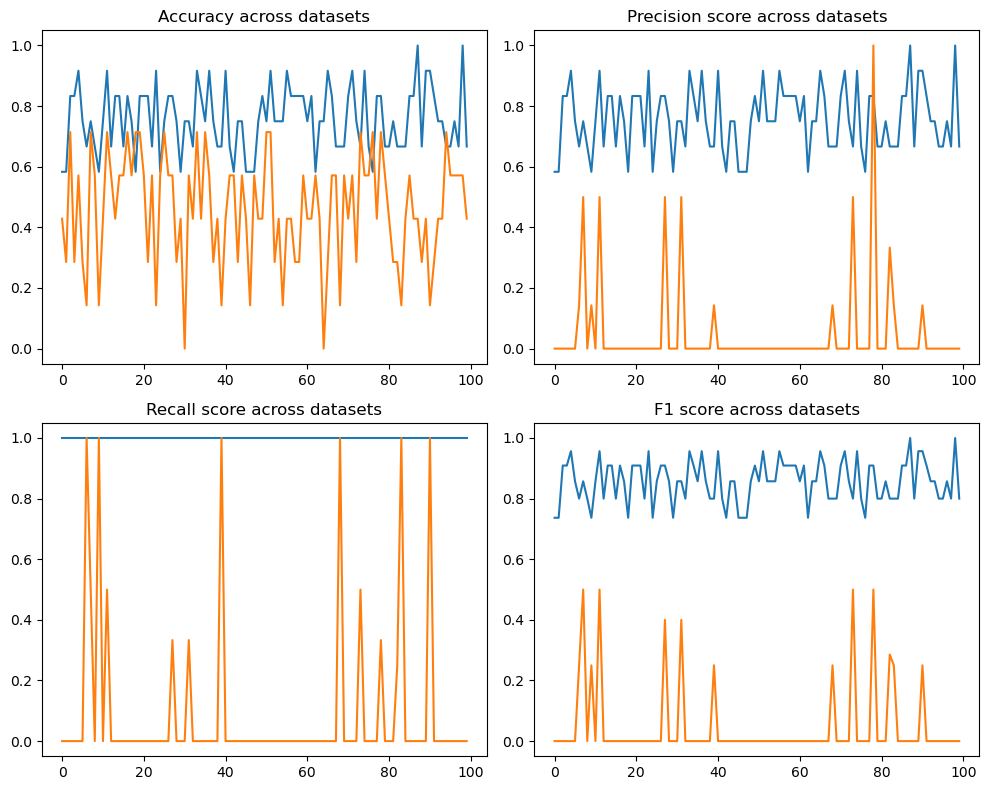

Training Results of RF model
Final avg accuracy across datasets after bootstrapping  0.5550595238095238
Final avg precision across datasets after bootstrapping  0.557205266955267
Final avg recall across datasets after bootstrapping  0.6224550865800866
Final avg F1 across datasets after bootstrapping  0.5625530749779976


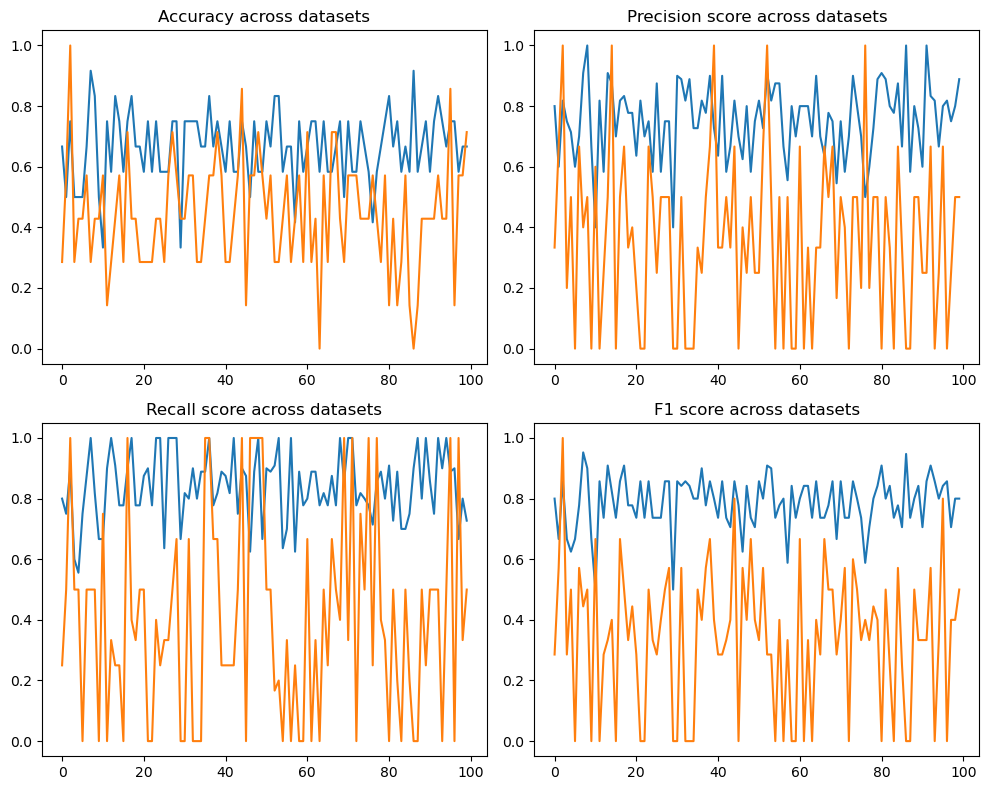

Training Results of KNN model
Final avg accuracy across datasets after bootstrapping  0.5473214285714285
Final avg precision across datasets after bootstrapping  0.5462207792207792
Final avg recall across datasets after bootstrapping  0.6817886002886003
Final avg F1 across datasets after bootstrapping  0.5808020025359842


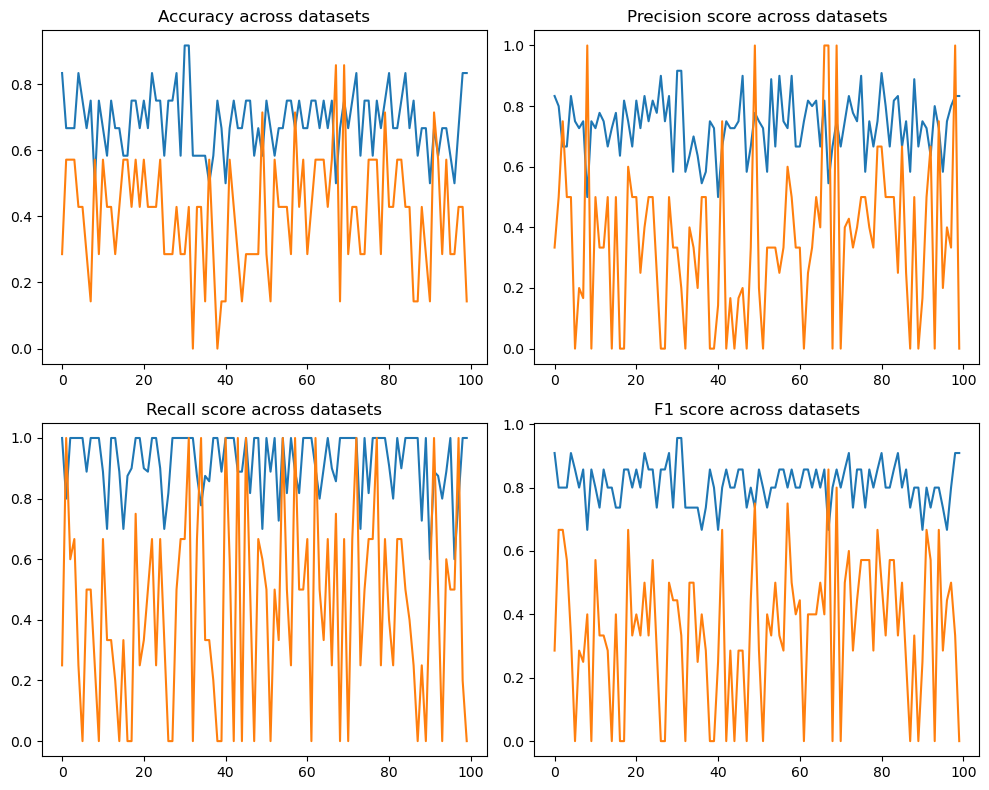

Now Training new models on the faecal samples
Reading file :  BWG_FA_CDvALL.mat
Reading file :  BWG_FA_CDvCTRL.mat
Classes :  Counter({2: 45, 1: 23})
Training Results of SVM model
Final avg accuracy across datasets after bootstrapping  0.7375555555555556
Final avg precision across datasets after bootstrapping  0.7326388888888888
Final avg recall across datasets after bootstrapping  0.8195833333333333
Final avg F1 across datasets after bootstrapping  0.7398134022839905


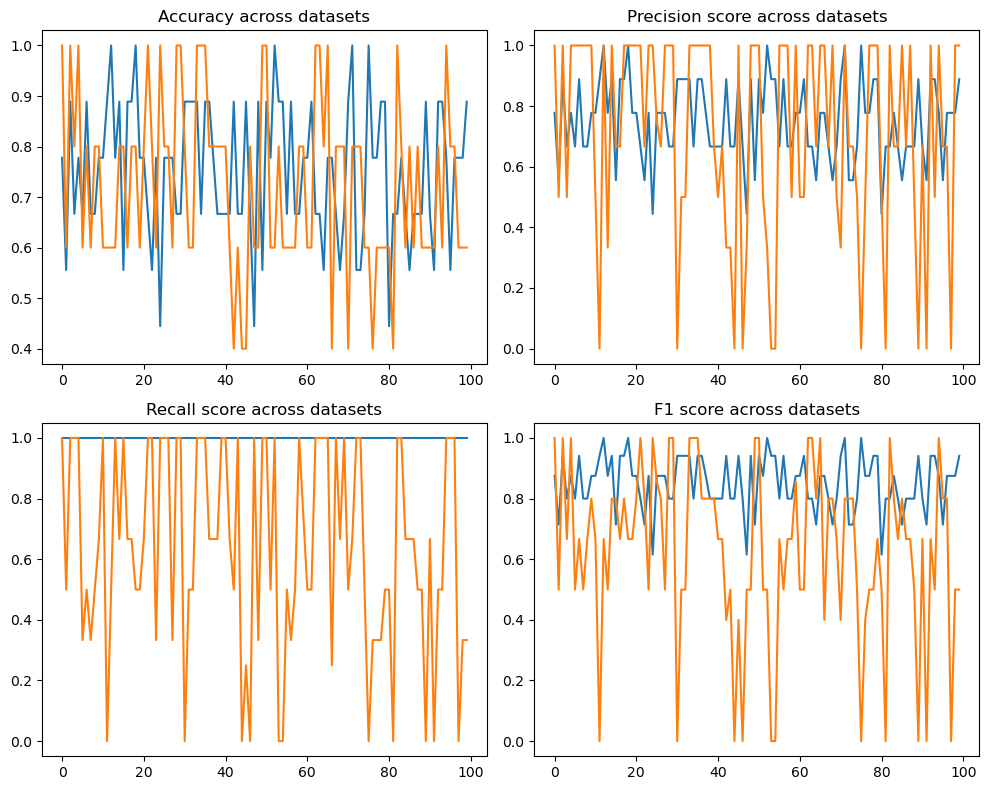

Training Results of RF model
Final avg accuracy across datasets after bootstrapping  0.8301111111111112
Final avg precision across datasets after bootstrapping  0.8489246031746032
Final avg recall across datasets after bootstrapping  0.8892936507936509
Final avg F1 across datasets after bootstrapping  0.8514463657257775


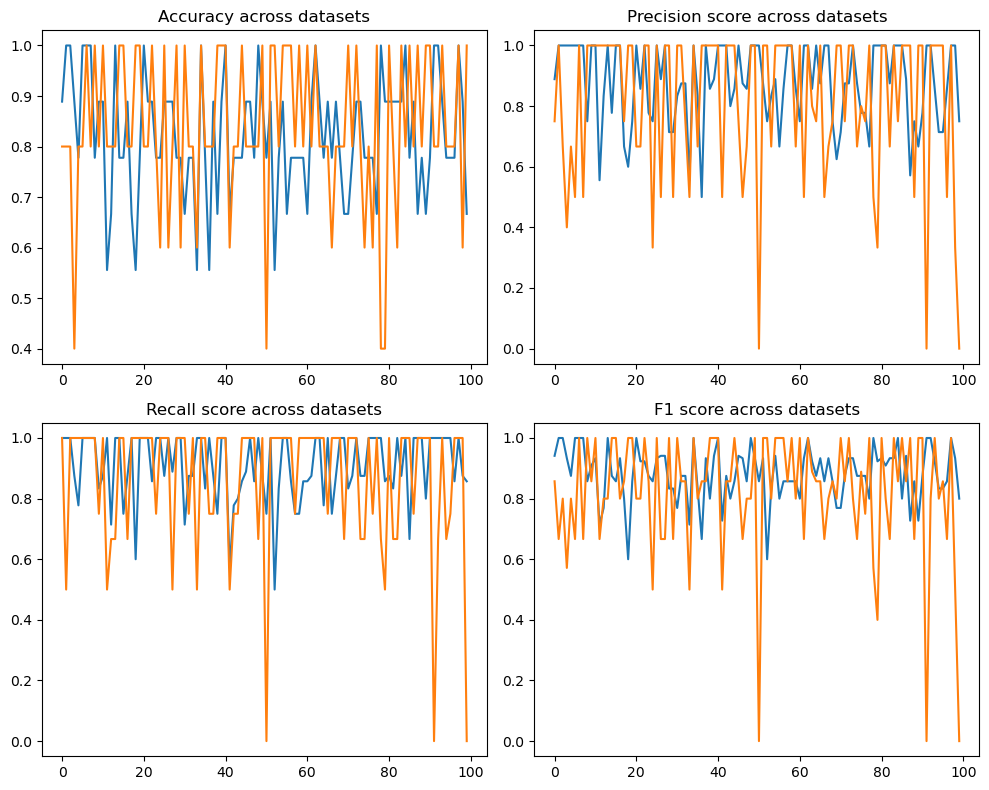

Training Results of KNN model
Final avg accuracy across datasets after bootstrapping  0.7697777777777779
Final avg precision across datasets after bootstrapping  0.8326944444444444
Final avg recall across datasets after bootstrapping  0.7914246031746032
Final avg F1 across datasets after bootstrapping  0.7885140986464516


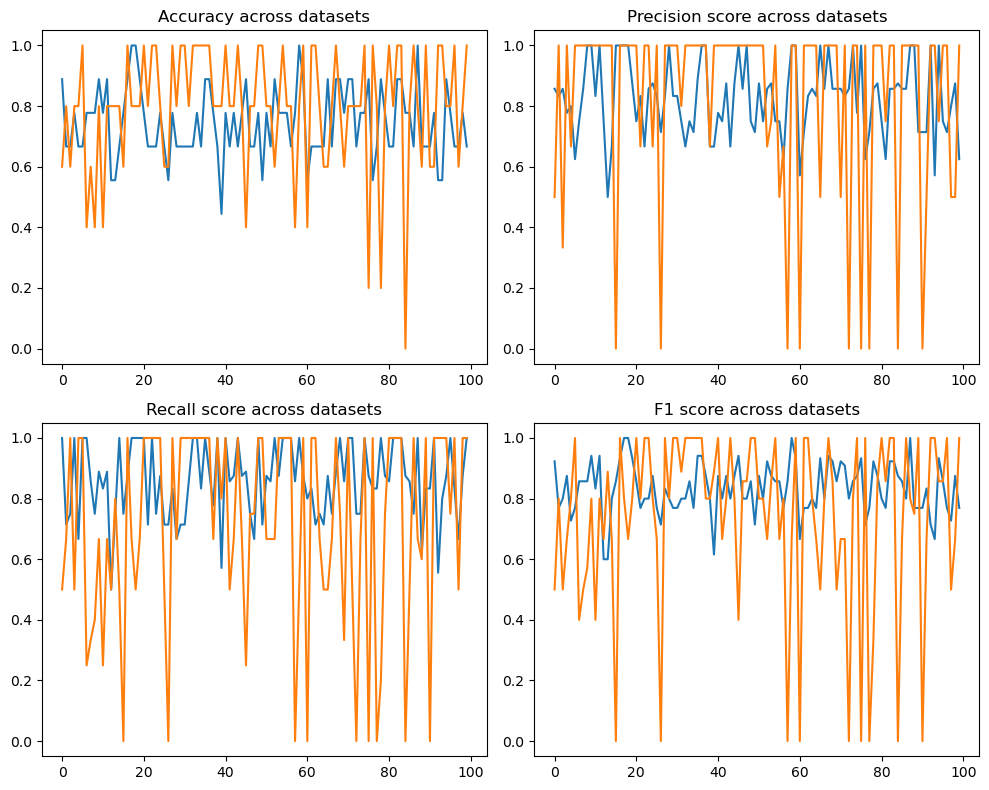

Now Training new models on the urine samples
Reading file :  BWG_UR_CDvALL.mat
Reading file :  BWG_UR_CDvCTRL.mat
Classes :  Counter({2: 37, 1: 21})
Training Results of SVM model
Final avg accuracy across datasets after bootstrapping  0.69375
Final avg precision across datasets after bootstrapping  0.40625
Final avg recall across datasets after bootstrapping  0.515
Final avg F1 across datasets after bootstrapping  0.44993040293040304


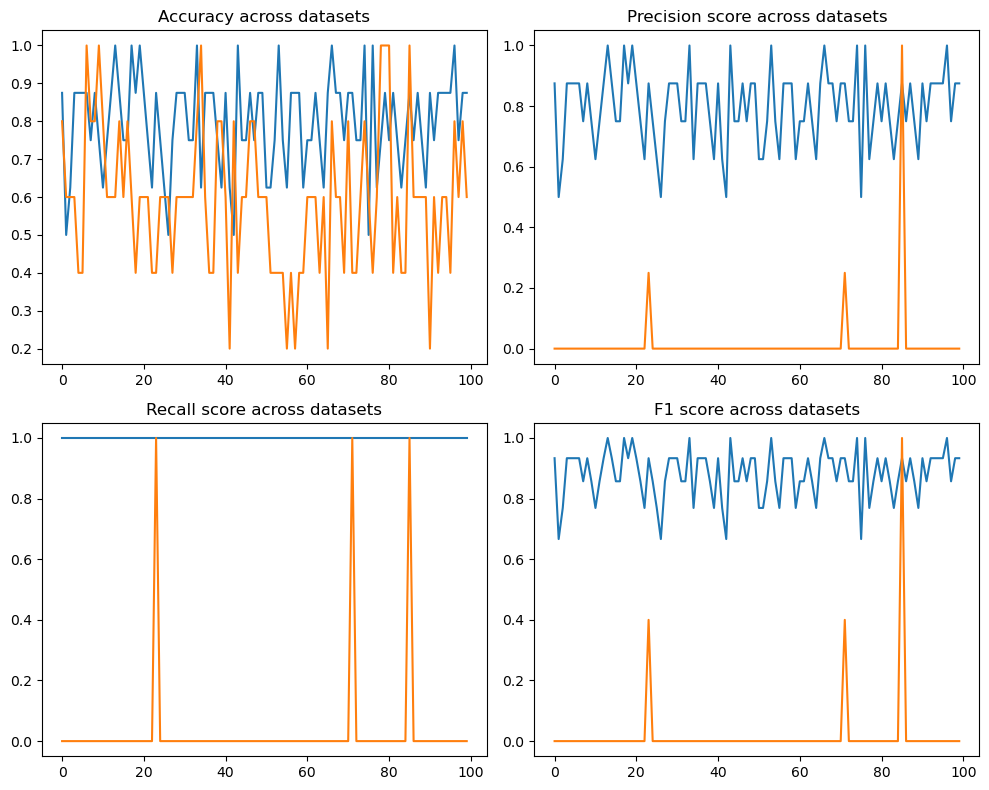

Training Results of RF model
Final avg accuracy across datasets after bootstrapping  0.725375
Final avg precision across datasets after bootstrapping  0.6047023809523808
Final avg recall across datasets after bootstrapping  0.6578571428571429
Final avg F1 across datasets after bootstrapping  0.6040512820512821


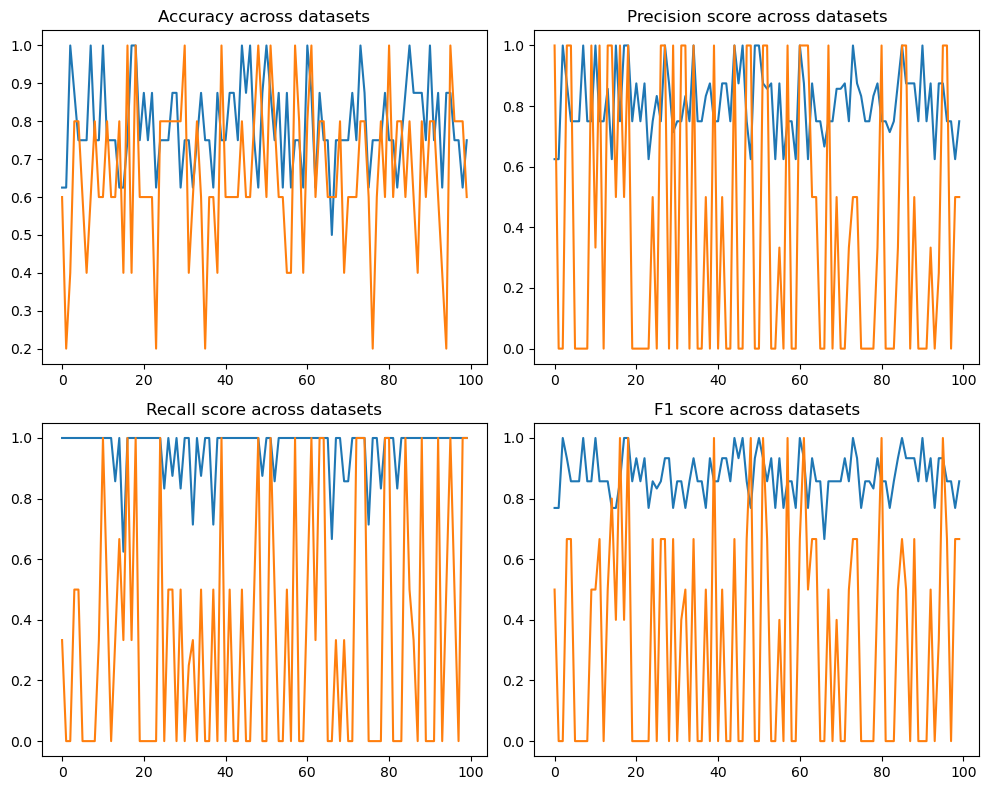

Training Results of KNN model
Final avg accuracy across datasets after bootstrapping  0.71675
Final avg precision across datasets after bootstrapping  0.6619464285714285
Final avg recall across datasets after bootstrapping  0.7315119047619048
Final avg F1 across datasets after bootstrapping  0.6584670329670331


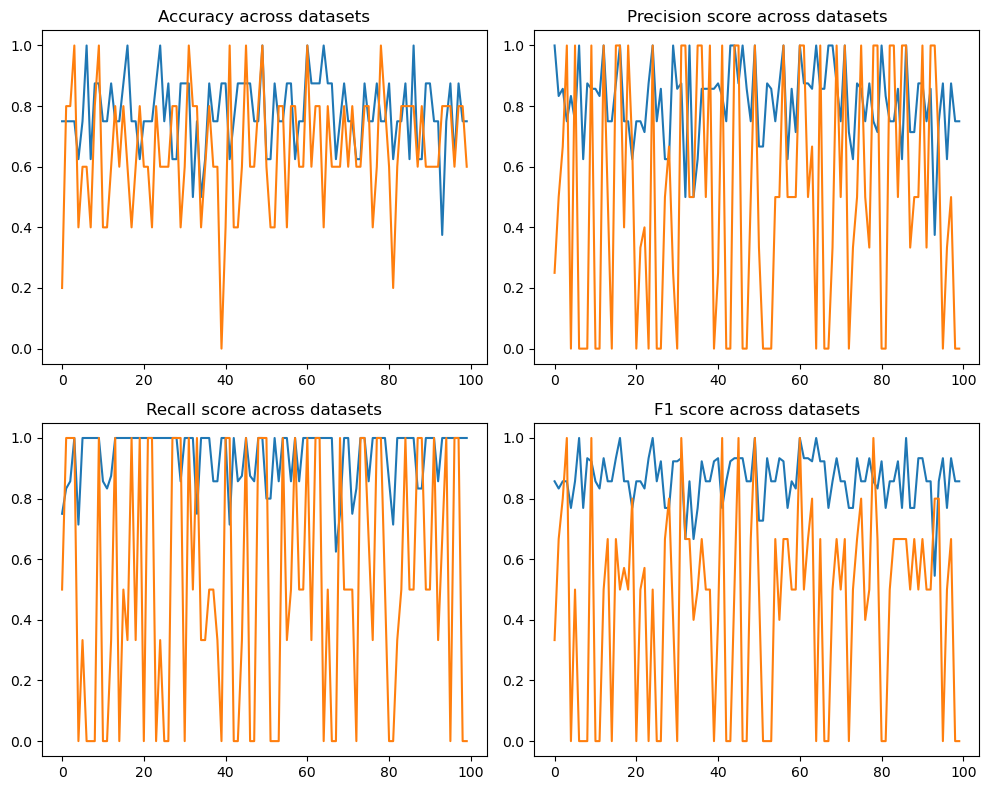

Now Training new models on the breath samples
Reading file :  BWG_BR_CDvALL.mat
Reading file :  BWG_BR_CDvCTRL.mat
Classes :  Counter({2: 59, 1: 36})
Training Results of SVM model
Final avg accuracy across datasets after bootstrapping  0.5635119047619047
Final avg precision across datasets after bootstrapping  0.3808928571428571
Final avg recall across datasets after bootstrapping  0.6175
Final avg F1 across datasets after bootstrapping  0.45852725100164193


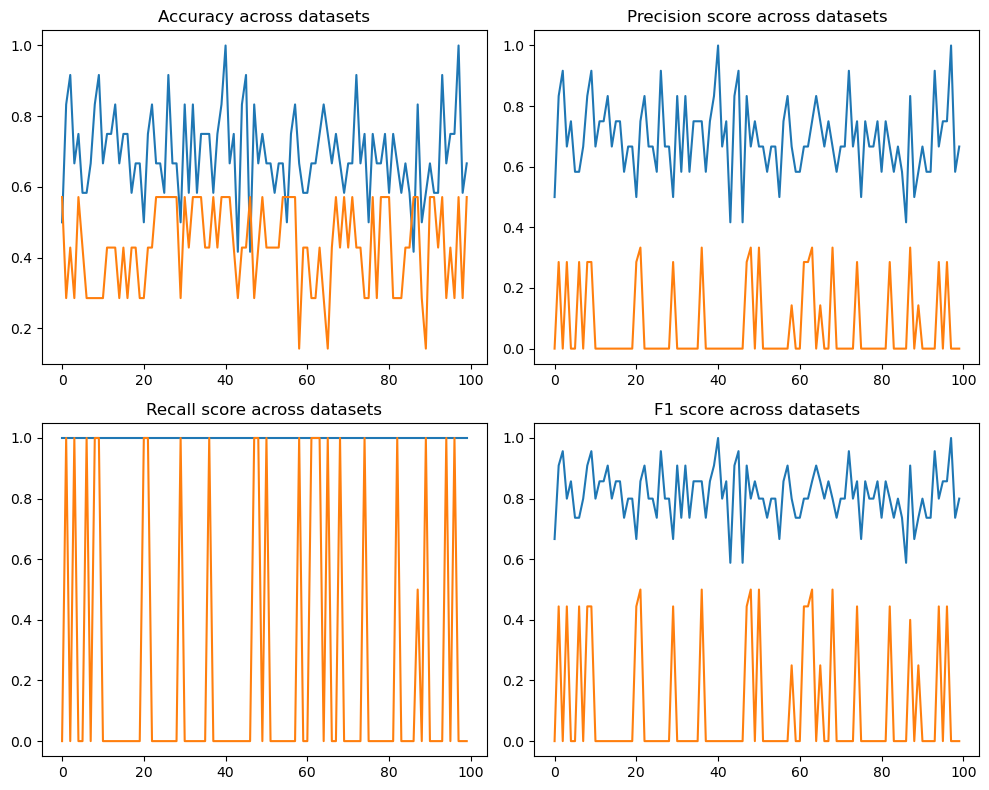

Training Results of RF model
Final avg accuracy across datasets after bootstrapping  0.702797619047619
Final avg precision across datasets after bootstrapping  0.7188066378066378
Final avg recall across datasets after bootstrapping  0.7632052669552669
Final avg F1 across datasets after bootstrapping  0.7064341877461914


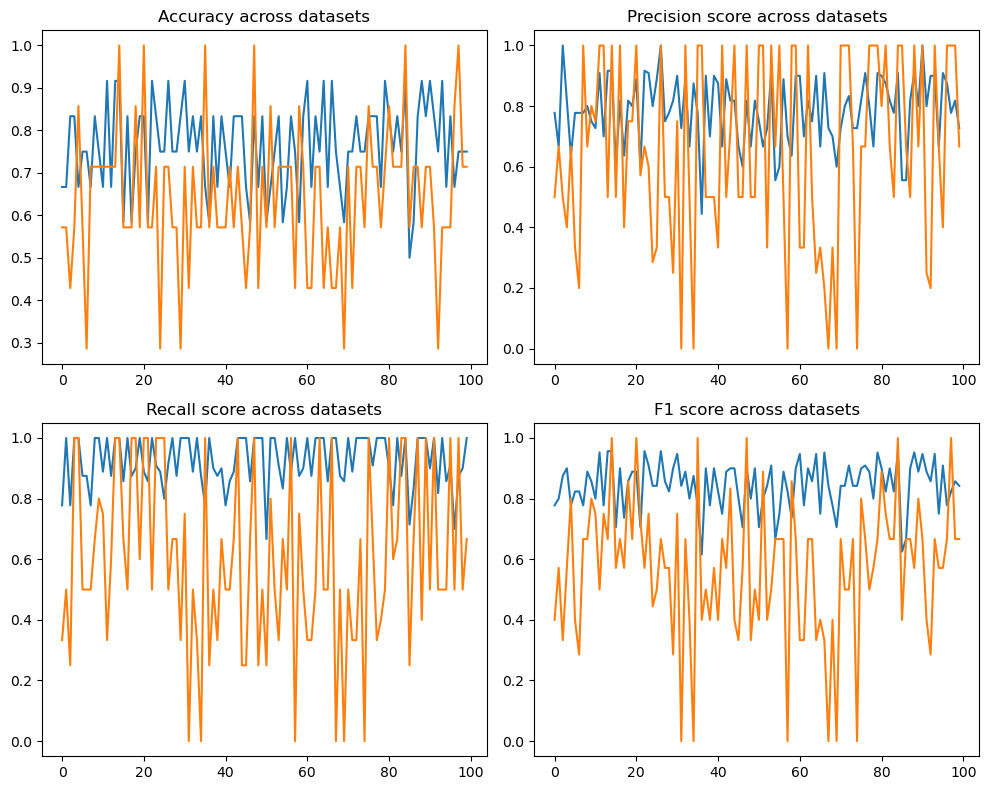

Training Results of KNN model
Final avg accuracy across datasets after bootstrapping  0.6259523809523809
Final avg precision across datasets after bootstrapping  0.6639190115440116
Final avg recall across datasets after bootstrapping  0.6882142857142857
Final avg F1 across datasets after bootstrapping  0.650103957332134


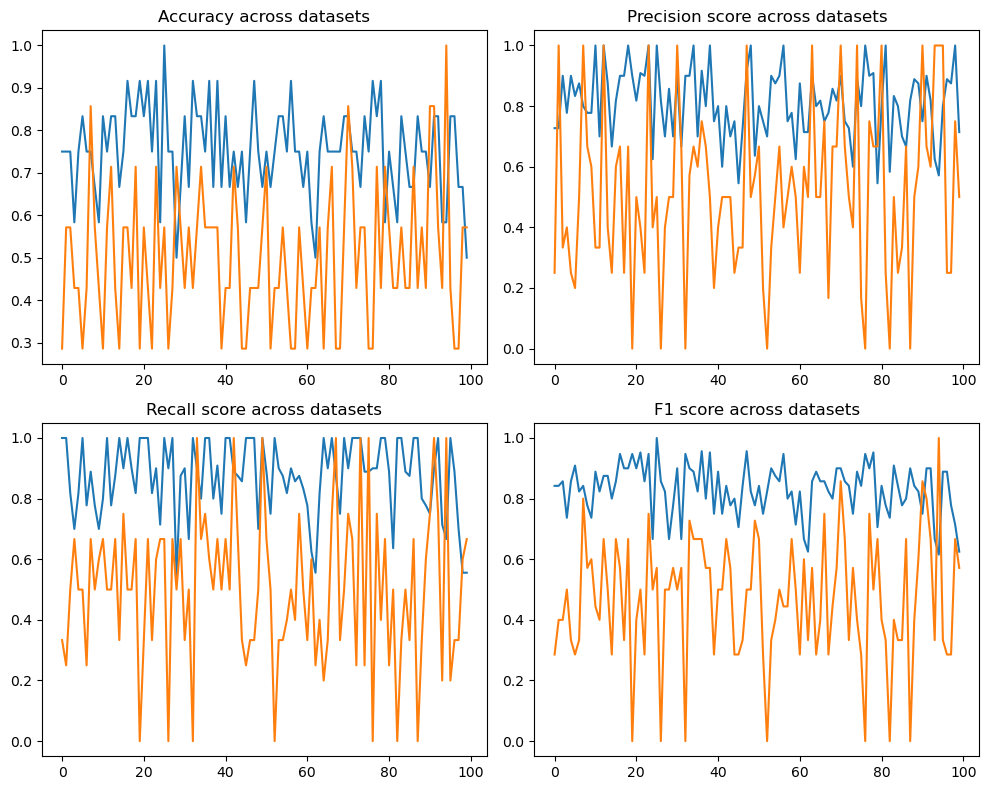

In [7]:
#Get the files for specific data subset
sample_classes = ['blood', 'faecal', 'urine', 'breath']
#We nned to compare the model's performance on 
for cl in sample_classes:
    print("Now Training new models on the " + cl + " samples")
    matfiles = []  #store filenames
    thispath = path_to_data + '/' + cl + '/'    
    for files in os.listdir(thispath):
        #Since we only require data samples for Crohn's Disease
        if 'CD' in files:
            print("Reading file : ", files)
            path = thispath + files
            matfiles.append(path)

    #define models
    model1 = svm.SVC(kernel = 'rbf')
    model2 = RandomForestClassifier(max_depth=10)
    model3 = KNeighborsClassifier(n_neighbors=5)

    #organize data into dictionaries
    dict_Xy = pre_process(matfiles)

    #check for class imbalance
    classes = [cls for key in dict_Xy.keys() for cls in key]
    class_counts = Counter(classes)
    print("Classes : ", class_counts)

    #train models
    
    print("Training Results of SVM model")
    bootstrap(dict_Xy, model1)

    print("Training Results of RF model")
    bootstrap(dict_Xy, model2)

    print("Training Results of KNN model")
    bootstrap(dict_Xy, model3)